In [16]:

import numpy as np
import os
from pathlib import Path

import matplotlib.pyplot as plt
from keras.preprocessing import image

p = Path("train/")
dirs = p.glob("*")
labels_dict = {'PNEUMONIA':0, 'NORMAL':1}

image_data = []
labels = []    

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1][:len(str(folder_dir))]
    
    for img_path in folder_dir.glob("*.jpeg"):
        img = image.load_img(img_path, target_size=(192,192))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

In [17]:
print(len(labels))
print(len(image_data))

5216
5216


In [18]:
#convert data to numpy array 
image_data = np.array(image_data, dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape, labels.shape)
print(image_data)


(5216, 192, 192, 3) (5216,)
[[[[0.80784315 0.80784315 0.80784315]
   [0.8156863  0.8156863  0.8156863 ]
   [0.8039216  0.8039216  0.8039216 ]
   ...
   [0.77254903 0.77254903 0.77254903]
   [0.78431374 0.78431374 0.78431374]
   [0.8352941  0.8352941  0.8352941 ]]

  [[0.8        0.8        0.8       ]
   [0.8039216  0.8039216  0.8039216 ]
   [0.8        0.8        0.8       ]
   ...
   [0.78039217 0.78039217 0.78039217]
   [0.83137256 0.83137256 0.83137256]
   [0.8156863  0.8156863  0.8156863 ]]

  [[0.8        0.8        0.8       ]
   [0.8        0.8        0.8       ]
   [0.8        0.8        0.8       ]
   ...
   [0.7764706  0.7764706  0.7764706 ]
   [0.81960785 0.81960785 0.81960785]
   [0.8352941  0.8352941  0.8352941 ]]

  ...

  [[0.07058824 0.07058824 0.07058824]
   [0.05098039 0.05098039 0.05098039]
   [0.04313726 0.04313726 0.04313726]
   ...
   [0.18431373 0.18431373 0.18431373]
   [0.1882353  0.1882353  0.1882353 ]
   [0.2        0.2        0.2       ]]

  [[0.05490196 0.

In [19]:
print(image_data[1])

[[[0.         0.         0.        ]
  [0.00784314 0.00784314 0.00784314]
  [0.05098039 0.05098039 0.05098039]
  ...
  [0.19215687 0.19215687 0.19215687]
  [0.1882353  0.1882353  0.1882353 ]
  [0.1764706  0.1764706  0.1764706 ]]

 [[0.         0.         0.        ]
  [0.03921569 0.03921569 0.03921569]
  [0.05098039 0.05098039 0.05098039]
  ...
  [0.21176471 0.21176471 0.21176471]
  [0.2        0.2        0.2       ]
  [0.19607843 0.19607843 0.19607843]]

 [[0.01960784 0.01960784 0.01960784]
  [0.04705882 0.04705882 0.04705882]
  [0.07843138 0.07843138 0.07843138]
  ...
  [0.21176471 0.21176471 0.21176471]
  [0.22745098 0.22745098 0.22745098]
  [0.20392157 0.20392157 0.20392157]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.13333334 0.13333334 0.13333334]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


In [20]:

## Randomly shuffle data

import random 
combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

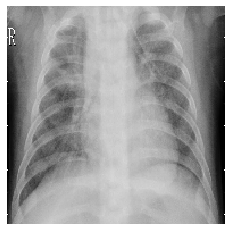

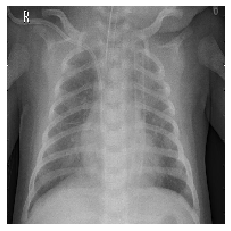

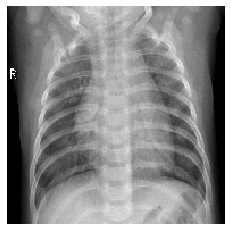

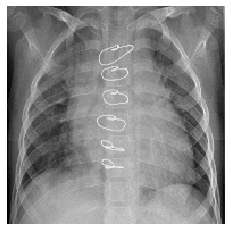

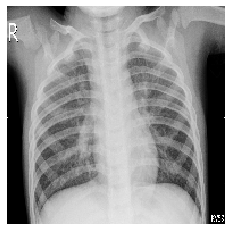

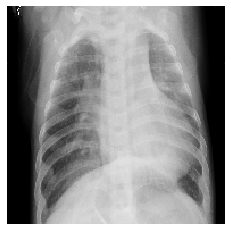

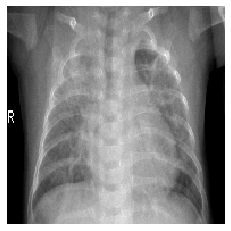

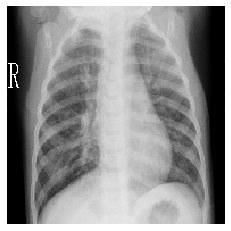

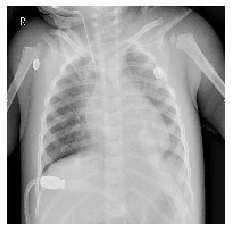

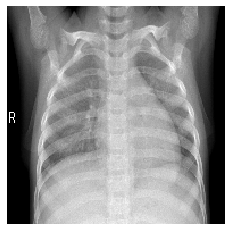

In [21]:

## Visualize the data

def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(10):
    drawImg(image_data[i])

In [22]:

## Data conversion for One vs One classification

M = image_data.shape[0]
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(5216, 110592)
(5216,)


In [23]:
from sklearn import svm

In [ ]:
# Train SVM and get train accuracy 

svm_classifier = svm.SVC(kernel='linear', C=1.0) #learning rate =1 
svm_classifier.fit(image_data, labels)
ypred_sklearn = svm_classifier.predict(image_data)
svm_classifier.score(image_data,labels)